# The Finest Wine

By now, you've become an accomplished chef, well-known worldwide. At this stage, you've honed your craft almost to perfection. The only remaining step is to source the finest ingredients for your restaurant. Your first focus is on testing wine quality. You've dispatched a team of researchers to gather data about various wines, while your task is to develop a model that predicts wine quality based on its distinctive characteristics.

* Task: Using the dataset below, find the model that best predicts `quality` in `y_test`.

Most of the code is given to you. Your task is to try out different algorithms using `x_train` and `y_train` and find the most accurate one. Then, use that model to generate predictions using `x_test`, save those predictions to a CSV, and email those predictions to emilio@northwestern.edu.

You don't have access to `y_test`. Emilio will calculate your predictive accuracy on `y_test`.

The number of points that you get for this puzzle depends on the accuracy of your model as following:
- $R^2$ lower than 0.2: 0 points
- $R^2$ between 0.2 and 0.4: 50 points
- $R^2$ between 0.41 and 0.5: 75 points
- $R^2$ above 0.5: 100 points

## Installing library to fetch data

In [ ]:
pip install ucimlrepo

## Importing libraries and setting options

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
import pandas as pd

pd.set_option('display.max_columns', None)

## Fetching data

[Wine Quality dataset](https://archive.ics.uci.edu/dataset/186/wine+quality) from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/). Dataset with 11 numeric predictors and a numeric response for 4890 observations with no missing data.

In [ ]:
wine_quality = fetch_ucirepo(id=186)

x = wine_quality.data.features
y = wine_quality.data.targets

## Splitting into training and test sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11323)

print('x_train size: ', x_train.shape)
print('x_test size: ', x_test.shape)
print('y_train size: ', y_train.shape)
print('y_test size: ', y_test.shape)

# Saving data to give students
# x_train.to_csv('x_train.csv')
# x_test.to_csv('x_test.csv')
# y_train.to_csv('y_train.csv')
# y_test.to_csv('y_test.csv')

x_train size:  (5197, 11)
x_test size:  (1300, 11)
y_train size:  (5197, 1)
y_test size:  (1300, 1)


## Exploratory data analysis

<Axes: ylabel='Frequency'>

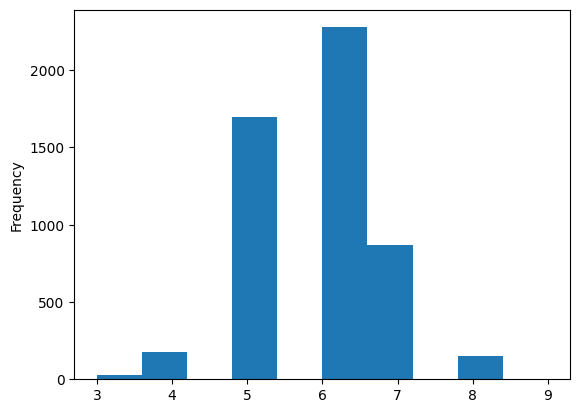

In [ ]:
y_train['quality'].plot(kind='hist')

In [ ]:
x_train.apply(lambda col: y_train.corrwith(col))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,-0.073021,-0.263313,0.094806,-0.039801,-0.199849,0.043944,-0.044352,-0.313357,0.011233,0.041336,0.450141


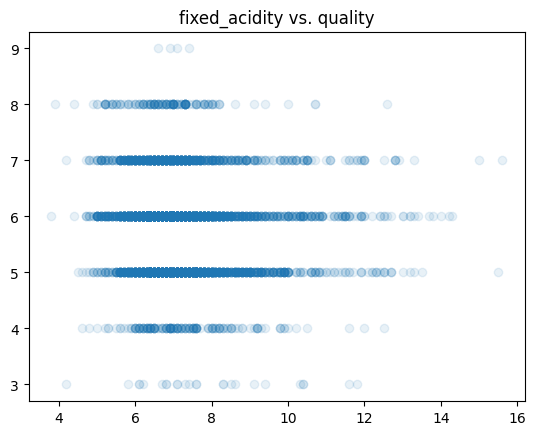

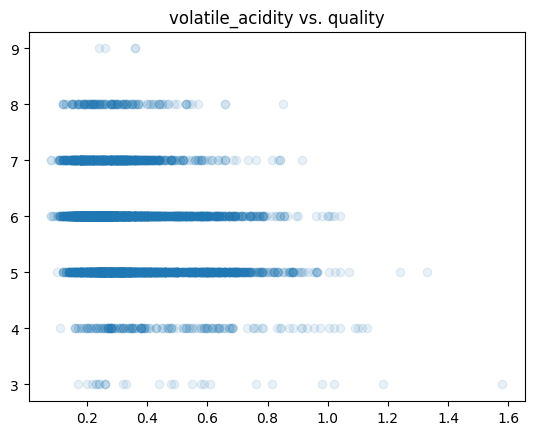

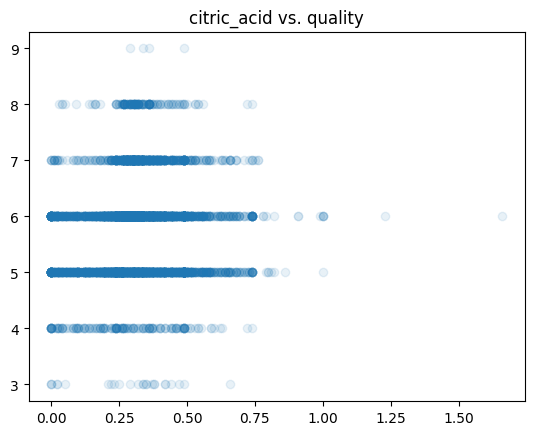

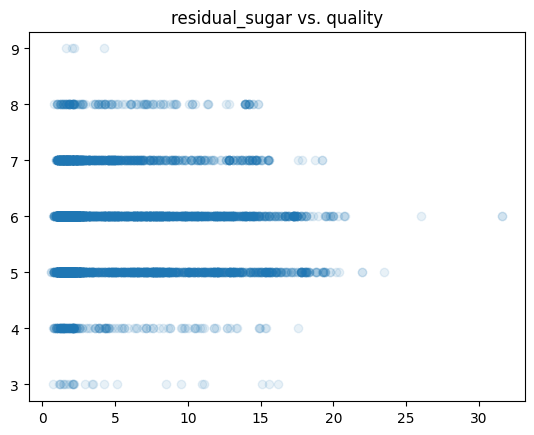

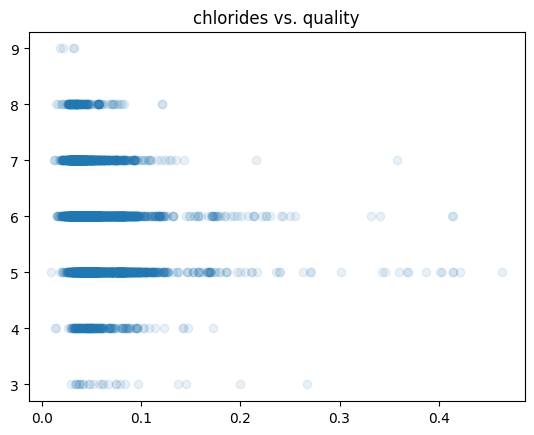

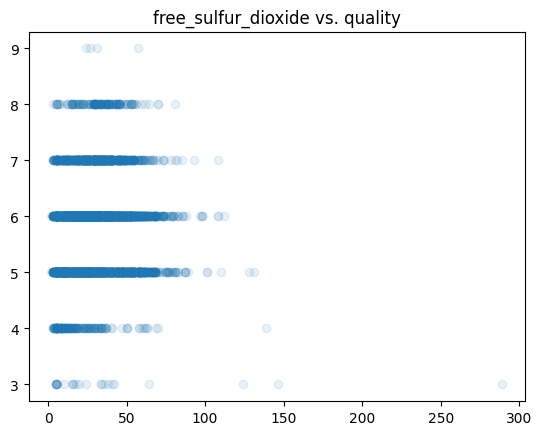

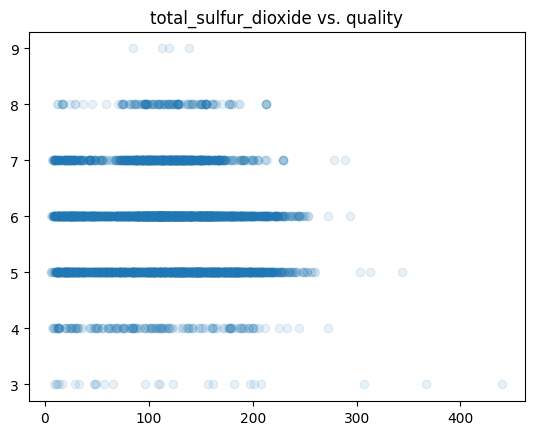

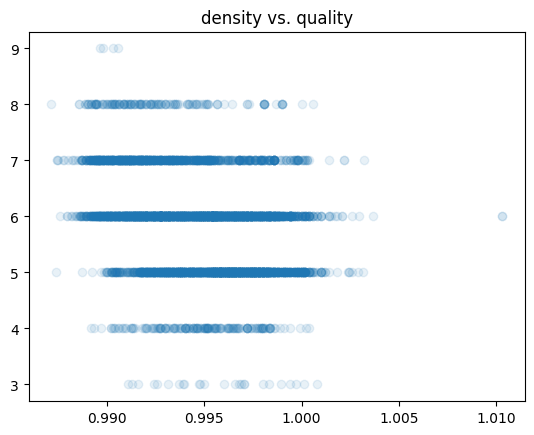

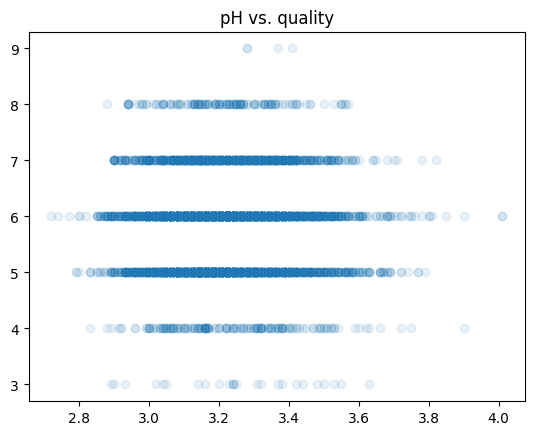

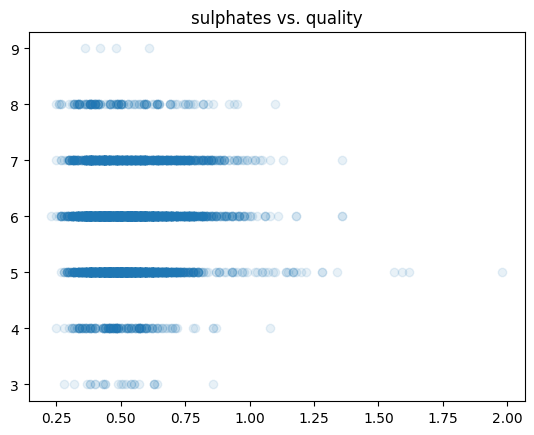

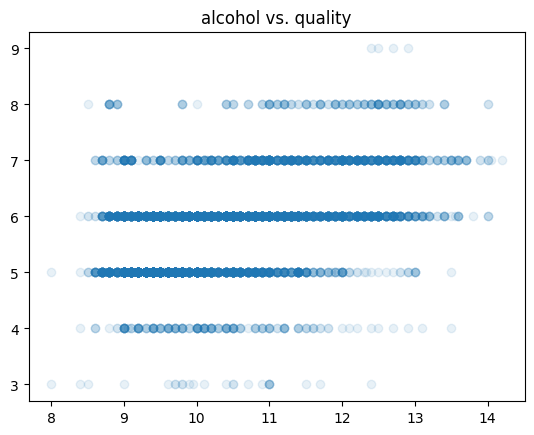

In [ ]:
for col in x_train.columns:
    plt.scatter(x_train[col], y_train, alpha=0.1)
    plt.title(f'{col} vs. quality')
    plt.show()

- There could be some issues with outliers
- There doesn't seem to be any apparent non-linear pattern... though there could be
- Some variable selection needed... most relevant probably `alcohol`, as well as `volatile_acidity` and `fixed_acidity`

In [ ]:
x_train.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,0.217599,0.332046,-0.123116,0.311044,-0.288000,-0.333502,0.464810,-0.255080,0.302882,-0.093931
volatile_acidity,0.217599,1.000000,-0.383850,-0.208425,0.389654,-0.350476,-0.412530,0.269084,0.265539,0.230306,-0.035780
citric_acid,0.332046,-0.383850,1.000000,0.132733,0.012575,0.125304,0.191700,0.087377,-0.327849,0.041132,-0.002689
residual_sugar,-0.123116,-0.208425,0.132733,1.000000,-0.140120,0.415925,0.501634,0.536584,-0.265786,-0.198821,-0.370117
chlorides,0.311044,0.389654,0.012575,-0.140120,1.000000,-0.211077,-0.295226,0.376362,0.061113,0.373957,-0.255625
free_sulfur_dioxide,-0.288000,-0.350476,0.125304,0.415925,-0.211077,1.000000,0.723493,0.027696,-0.148059,-0.195909,-0.178180
total_sulfur_dioxide,-0.333502,-0.412530,0.191700,0.501634,-0.295226,0.723493,1.000000,0.024817,-0.238322,-0.286873,-0.263473
density,0.464810,0.269084,0.087377,0.536584,0.376362,0.027696,0.024817,1.000000,0.012357,0.263259,-0.698399
pH,-0.255080,0.265539,-0.327849,-0.265786,0.061113,-0.148059,-0.238322,0.012357,1.000000,0.207101,0.126059
sulphates,0.302882,0.230306,0.041132,-0.198821,0.373957,-0.195909,-0.286873,0.263259,0.207101,1.000000,0.002126


There could be some issues with multicolinearity..., particularly with:
- `fixed_acidity` <> `pH`
- `residual_sugar` <> `density`
- `residual_sugar` <> `alcohol`
- `residual_sugar` <> `free_sulfur_dioxide`
- `chlorides` <> `alcohol`
- `free_sulfur_dioxide` <> `total_sulfur_dioxide`
- `total_sulfur_dioxide` <> `density`
- `total_sulfur_dioxide` <> `alcohol`
- `density` <> `alcohol`

Maybe try `alcohol` by itself and then in combination with `volatile_acidity` and `fixed_acidity`

## Modeling / trying out different algorithms

You may want to take a look at the algorithms available for [supervised learning in Scikit-Learn](https://scikit-learn.org/stable/supervised_learning.html). You could also find [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) useful.

### First, the models suggested by the exploratory data analysis...

In [ ]:
print('alcohol test score: ', r2_score(y_test, LinearRegression().fit(x_train[['alcohol']], y_train).predict(x_test[['alcohol']])))
print('alcohol, volatile_acidity, and fixed_acidity test score: ', r2_score(y_test, LinearRegression().fit(x_train[['alcohol', 'volatile_acidity', 'fixed_acidity']], y_train).predict(x_test[['alcohol', 'volatile_acidity', 'fixed_acidity']])))

alcohol test score:  0.17631942472226148
alcohol, volatile_acidity, and fixed_acidity test score:  0.24169379073766994


### Now, trying out different algorithms

In [ ]:
# Initializing classes to be used to fit models
# Of course, you can use other classes
robust_scaler = RobustScaler() # https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
rf = RandomForestRegressor()
bt = GradientBoostingRegressor()
nn = MLPRegressor()

# Creating pipeline for pre-processing and model fitting
pipe = Pipeline([
    ('scaler', robust_scaler), # Could try various options
    ('estimator', lr)
])

# Defining parameters for search
# You need to search a broad enough space for parameters, which this code is not doing
# There are other parameters that you can tune
parameters = [
    {
        'estimator': [lr]
    },
    {
        'estimator': [lasso],
        'estimator__alpha': [0.0001]
        # 'estimator__alpha': [0.001, 0.0001, 0.00001]
    },
    {
        'estimator': [ridge],
        'estimator__alpha': [75]
        # 'estimator__alpha': [50, 75, 100]
    },
    {
        'estimator': [rf],
        'estimator__random_state': [11323],
        'estimator__oob_score': [True],
        'estimator__max_features': [3]
        # 'estimator__max_features': [2, 3, 4]
    },
    {
        'estimator': [bt],
        'estimator__random_state': [11323],
        'estimator__learning_rate': [0.25],
        'estimator__n_estimators': [500]
        # 'estimator__n_estimators': [100, 500, 1000] # not exhaustive
    },
    {
        'estimator': [nn],
        'estimator__random_state': [11323],
        'estimator__max_iter': [1000],
        'estimator__hidden_layer_sizes': [(11,)]
        # 'estimator__hidden_layer_sizes': [(6,), (11,), (50,)] # not exhaustive
    }
]

# Using GridSearchCV
grid = GridSearchCV(pipe, param_grid = parameters, cv = 10)
grid.fit(x_train, y_train.values.ravel()) # https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

# Defining variable with best model
best_model = grid.best_estimator_

# Printing results of grid search
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__alpha,param_estimator__max_features,param_estimator__oob_score,param_estimator__random_state,param_estimator__learning_rate,param_estimator__n_estimators,param_estimator__hidden_layer_sizes,param_estimator__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,2.525999,0.880497,0.055287,0.028725,"RandomForestRegressor(max_features=3, oob_scor...",NaN,3,True,11323,NaN,NaN,NaN,NaN,{'estimator': RandomForestRegressor(max_featur...,0.535974,0.539542,0.517710,0.501389,0.516948,0.493129,0.510969,0.524450,0.522574,0.527615,0.519030,0.013699,1
4,4.969660,0.711165,0.006337,0.000083,GradientBoostingRegressor(),NaN,NaN,NaN,11323,0.25,500,NaN,NaN,"{'estimator': GradientBoostingRegressor(), 'es...",0.451161,0.457656,0.410945,0.392320,0.406938,0.363660,0.453121,0.427210,0.415726,0.409436,0.418817,0.028012,2
5,2.585882,0.485577,0.002368,0.000327,MLPRegressor(),NaN,NaN,NaN,11323,NaN,NaN,"(11,)",1000,"{'estimator': MLPRegressor(), 'estimator__hidd...",0.394571,0.403458,0.353556,0.313200,0.381308,0.258533,0.340989,0.355279,0.356645,0.351983,0.350952,0.039631,3
1,0.017711,0.002057,0.002603,0.000148,Lasso(),0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'estimator': Lasso(), 'estimator__alpha': 0.0...",0.290626,0.315590,0.260154,0.272822,0.337728,0.195513,0.287765,0.316187,0.302962,0.301491,0.288084,0.037418,4
0,0.013346,0.000790,0.002448,0.000063,LinearRegression(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'estimator': LinearRegression()},0.290538,0.315583,0.260082,0.272865,0.337525,0.195451,0.287860,0.316319,0.303024,0.301542,0.288079,0.037423,5
2,0.018607,0.006923,0.002886,0.001293,Ridge(),75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'estimator': Ridge(), 'estimator__alpha': 75}",0.289854,0.314112,0.261369,0.273056,0.338657,0.199054,0.286514,0.314522,0.302669,0.299301,0.287911,0.036254,6


## Getting benchmarks to grade (assign points) to student submissions

In [ ]:
# Fitting models selected through cross validation in training data
rf = RandomForestRegressor(random_state=11323, oob_score=True, max_features=3).fit(x_train, y_train.values.ravel())
bt = GradientBoostingRegressor(random_state=11323, learning_rate=0.25, n_estimators=500).fit(x_train, y_train.values.ravel())
nn = MLPRegressor(random_state=11323, max_iter=1000, hidden_layer_sizes=(11,)).fit(x_train, y_train.values.ravel())
lasso = Lasso(alpha=0.0001).fit(x_train, y_train.values.ravel())
lr = LinearRegression().fit(x_train, y_train.values.ravel())
ridge = Ridge(alpha=75).fit(x_train, y_train.values.ravel())

# Getting predictions on test data
rf_pred = rf.predict(x_test)
bt_pred = bt.predict(x_test)
nn_pred = nn.predict(x_test)
lasso_pred = lasso.predict(x_test)
lr_pred = lr.predict(x_test)
ridge_pred = ridge.predict(x_test)

# Getting accuracy on test data
print('rf_pred', r2_score(y_test, rf_pred))
print('bt_pred', r2_score(y_test, bt_pred))
print('nn_pred', r2_score(y_test, nn_pred))
print('lasso_pred', r2_score(y_test, lasso_pred))
print('lr_pred', r2_score(y_test, lr_pred))
print('ridge_pred', r2_score(y_test, ridge_pred))

# Saving predictions to CSV to test script to evaluate submissions
pd.DataFrame({'predictions': rf_pred}, index=x_test.index).to_csv('rf_pred.csv')
pd.DataFrame({'predictions': bt_pred}, index=x_test.index).to_csv('bt_pred.csv')
pd.DataFrame({'predictions': nn_pred}, index=x_test.index).to_csv('nn_pred.csv')
pd.DataFrame({'predictions': lasso_pred}, index=x_test.index).to_csv('lasso_pred.csv')
pd.DataFrame({'predictions': lr_pred}, index=x_test.index).to_csv('lr_pred.csv')
pd.DataFrame({'predictions': ridge_pred}, index=x_test.index).to_csv('ridge_pred.csv')

rf_pred 0.4992750161504199
bt_pred 0.4324706189142725
nn_pred 0.22713835752473732
lasso_pred 0.2784962234869247
lr_pred 0.28243741768722763
ridge_pred 0.2624482981631445
